**Sustainable Software Development, block course, March 2021**  
*Scientific Software Center, Institute for Scientific Computing, Dr. Inga Ulusoy*

# Analysis of the data

Imagine you perform a "measurement" of some type and obtain "scientific data". You know what your data represents, but you have only a vague idea how different features in the data are connected, and what information you can extract from the data.

You would start first with going through the data, making sure your data set is complete and that the result is reasonable. Imagine this already happened.

In the next step, you would inspect your data more closely and try to identify structures. That is the step that we are focusing on in this unit.

In the `data` folder, you will find several data files (`*.t` and `*.dat`). These are data files generated through some "new approach" that hasn't been used in your lab before. No previous analysis software exists, and you are going to establish a protocol for this "new approach" and "publish your results".

The data can be grouped into two categories: 
1. data to be analyzed using statistical methods;
2. data to be analyzed using numerical methods.

In your hypothetical lab, you are an "expert" in one particular "method", and your co-worker is an "expert" in the other. Combined these two methods will lead to much more impactful results than if only one of you analyzed the data. Now, the task in this course is to be solved collaboratively with your team member working on one of the analysis approaches, and you working on the other. You will both implement functionality into the same piece of "software", but do so collaboratively through git.

As you do not know yet which analysis is most meaningful for your data, and how to implement it, you will start with a jupyter notebook. You and your team member will work on the same notebook that will be part of a github repository for your project. This is the task for today. Discuss with your team members who will work on the statistical and who on the numerical analysis.

## Step 1

Accept the assignment through GitHub classroom.

## Step 2

Clone the repository to your local machine.

## Step 3

Start working on task 1 for your analysis approach. 


## Step 4

Create your own branch of the repository and commit your changes to your branch; push to the remote repository.

## Step 5

Open a `pull request` so your team member can review your implementation. Likewise, your team member will ask you to review theirs.

## Step 6

Merge the changes in your branch into `main`. Resolve conflicts.

## Step 7

Repeat working on task; committing and pushing to your previously generated branch or a new branch; open a pull request; merge with main; until you have finished all the tasks in your analysis approach. Delete obsolete branches.

# Start of the analysis notebook

**Author : Your Name**  
*Date : The date you started working on this*  
*Affiliation : The entity under whose name you are working on this*  

Place the required modules in the top, followed by required constants and global functions.

In [ ]:
# required modules

In [ ]:
# constants and global functions

In [ ]:
# reading of the data files

# Statistical analysis

Find correlations in the data sets. Analyse the data statistically and plot your results.  

Here we would want to do everything with pandas and leave the data in a dataframe. The files that are relevant to you are `expect.t`, `npop.t` and `table.dat`.

### Task 1: Read in expec.t and plot relevant data

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
expec_df = pd.read_csv('../data/expec.t', sep='\s+')
expec_df

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_104472/763761347.py:4: SyntaxWarning: invalid escape sequence '\s'
  expec_df = pd.read_csv('../data/expec.t', sep='\s+')


,time,norm,<x>,<y>,<z>,<H>
0,0.0,1.0,0.0,0.0,-2.196320,0.000000
1,0.1,1.0,0.0,0.0,-2.196320,0.000000
2,0.2,1.0,-0.0,0.0,-2.196320,0.000000
3,0.3,1.0,-0.0,0.0,-2.196320,0.000000
4,0.4,1.0,-0.0,0.0,-2.196320,0.000000
...,...,...,...,...,...,...
96,9.6,1.0,0.0,-0.0,-2.012171,0.032949
97,9.7,1.0,0.0,0.0,-1.441347,0.032949
98,9.8,1.0,0.0,0.0,-0.982419,0.032949
99,9.9,1.0,-0.0,0.0,-0.759304,0.032949


We can discard the entries norm, \<x>, and \<y> as these are mostly constant.

In [24]:
expec_filtered = expec_df.drop(columns=['norm', '<x>','<y>'])
expec_filtered


,time,<z>,<H>
0,0.0,-2.196320,0.000000
1,0.1,-2.196320,0.000000
2,0.2,-2.196320,0.000000
3,0.3,-2.196320,0.000000
4,0.4,-2.196320,0.000000
...,...,...,...
96,9.6,-2.012171,0.032949
97,9.7,-1.441347,0.032949
98,9.8,-0.982419,0.032949
99,9.9,-0.759304,0.032949


In [ ]:
# eliminate columns based on the variance: if the variance of the values
# in a column is below a given threshold, that column is discarded
variance_series = expec_filtered.var()
variance_series

var_cutoff = 1e-25
low_variance_columns = variance_series[variance_series < var_cutoff].index.tolist()
low_variance_columns

[]

In [26]:
expec_high_var = expec_filtered.drop(columns=low_variance_columns)
expec_high_var
# set time as index
expec_high_var.set_index('time', inplace=True)
expec_high_var

,<z>,<H>
time,,
0.0,-2.196320,0.000000
0.1,-2.196320,0.000000
0.2,-2.196320,0.000000
0.3,-2.196320,0.000000
0.4,-2.196320,0.000000
...,...,...
9.6,-2.012171,0.032949
9.7,-1.441347,0.032949
9.8,-0.982419,0.032949


### Task 2: Create plots of the relevant data and save as .pdf.

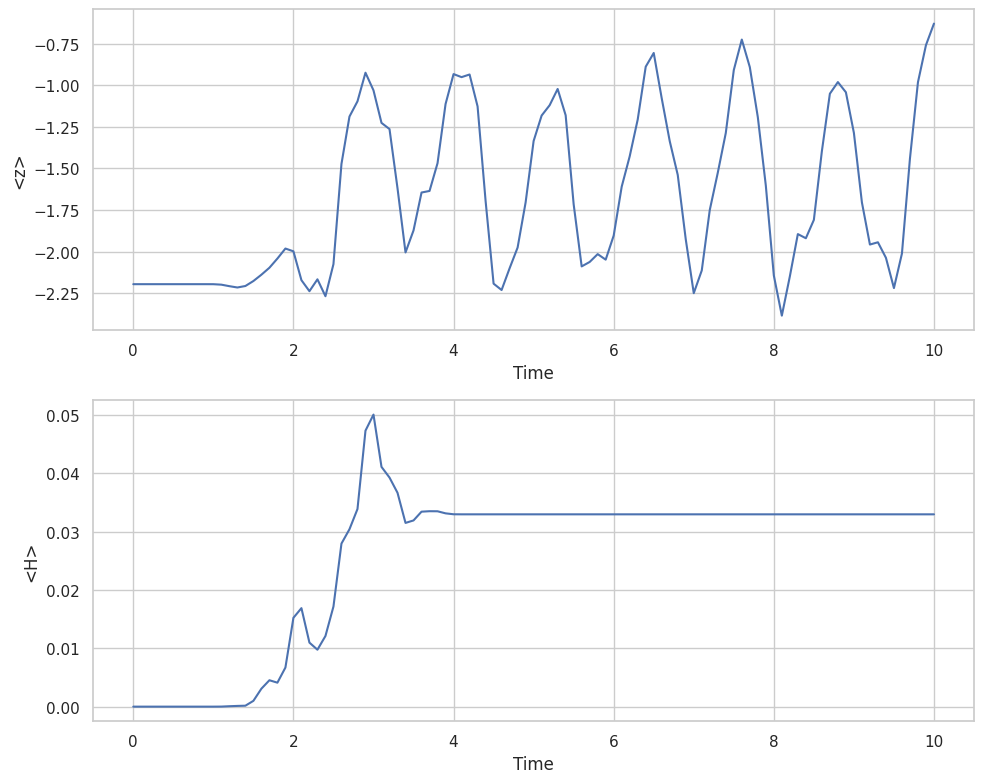

<Figure size 640x480 with 0 Axes>

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(expec_filtered['time'], expec_filtered['<z>'])
axes[0].set_xlabel('Time')
axes[0].set_ylabel('<z>')
axes[0].grid(True)

axes[1].plot(expec_filtered['time'], expec_filtered['<H>'])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('<H>')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('expec_plots.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.savefig('expec_plots.png', format='png', dpi=300, bbox_inches='tight')

### Task 3: Read in file `npop.t` and analyze correlations in the data

In [ ]:
# read in npop.t
npop_df = pd.read_csv('../data/npop.t', sep='\s+')
npop_df
# set time as index
npop_df.set_index('time', inplace=True)
npop_df




<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_104472/2641187424.py:2: SyntaxWarning: invalid escape sequence '\s'
  npop_df = pd.read_csv('../data/npop.t', sep='\s+')


,MO1,MO2,MO3,MO4,MO5,MO6,MO7,MO8,MO9,MO10,...,MO29,MO30,MO31,MO32,MO33,MO34,MO35,MO36,MO37,MO38
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.999974,0.999892,0.976819,0.976330,0.000708,0.005711,0.000158,0.000920,0.000158,0.000920,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
0.1,0.999974,0.999892,0.976819,0.976330,0.000708,0.005711,0.000158,0.000920,0.000158,0.000920,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
0.2,0.999974,0.999892,0.976819,0.976330,0.000708,0.005711,0.000158,0.000920,0.000158,0.000920,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
0.3,0.999974,0.999892,0.976819,0.976330,0.000708,0.005711,0.000158,0.000920,0.000158,0.000920,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
0.4,0.999974,0.999892,0.976819,0.976330,0.000708,0.005711,0.000158,0.000920,0.000158,0.000920,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,0.999979,0.999887,0.958403,0.797274,0.005708,0.148098,0.000343,0.001248,0.000427,0.001540,...,0.000752,0.000335,0.005750,0.000978,0.000295,0.000115,0.000297,0.000115,0.000260,0.000077
9.7,0.999976,0.999866,0.957587,0.804826,0.004443,0.093095,0.000327,0.001199,0.000456,0.001570,...,0.000787,0.000429,0.005558,0.000985,0.000305,0.000118,0.000305,0.000118,0.000269,0.000078
9.8,0.999978,0.999874,0.954496,0.794074,0.007291,0.128985,0.000389,0.001289,0.000224,0.001054,...,0.000667,0.000355,0.005969,0.000987,0.000290,0.000113,0.000293,0.000114,0.000252,0.000077


In [29]:
# discard all columns with variance below a set threshold - we can consider them as constant
variance_series_npop = npop_df.var()
variance_series_npop
var_cutoff_npop = 1e-7
low_variance_columns_npop = variance_series_npop[variance_series_npop < var_cutoff_npop].index.tolist()
npop_high_var = npop_df.drop(columns=low_variance_columns_npop)
npop_high_var

,MO3,MO4,MO5,MO6,MO11,MO12,MO13,MO14,MO19,MO20,MO28,MO31
time,,,,,,,,,,,,
0.0,0.976819,0.976330,0.000708,0.005711,0.004568,0.006659,0.000114,0.000107,0.006705,0.004241,0.000005,0.004893
0.1,0.976819,0.976330,0.000708,0.005711,0.004568,0.006659,0.000114,0.000107,0.006705,0.004241,0.000005,0.004893
0.2,0.976819,0.976330,0.000708,0.005711,0.004568,0.006659,0.000114,0.000107,0.006705,0.004241,0.000005,0.004893
0.3,0.976819,0.976330,0.000708,0.005711,0.004568,0.006659,0.000114,0.000107,0.006705,0.004241,0.000005,0.004893
0.4,0.976819,0.976330,0.000708,0.005711,0.004568,0.006659,0.000114,0.000107,0.006705,0.004241,0.000005,0.004893
...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,0.958403,0.797274,0.005708,0.148098,0.012219,0.027792,0.001413,0.014994,0.010414,0.005386,0.000064,0.005750
9.7,0.957587,0.804826,0.004443,0.093095,0.012243,0.030818,0.004150,0.059735,0.009937,0.005040,0.000054,0.005558
9.8,0.954496,0.794074,0.007291,0.128985,0.012491,0.020341,0.003529,0.046814,0.010823,0.003912,0.000063,0.005969


Plot the remaining columns. Seaborn prefers "long format" (one column for all measurement values, one column to indicate the type) as input, whereas the cvs is in "wide format" (one column per measurement type).

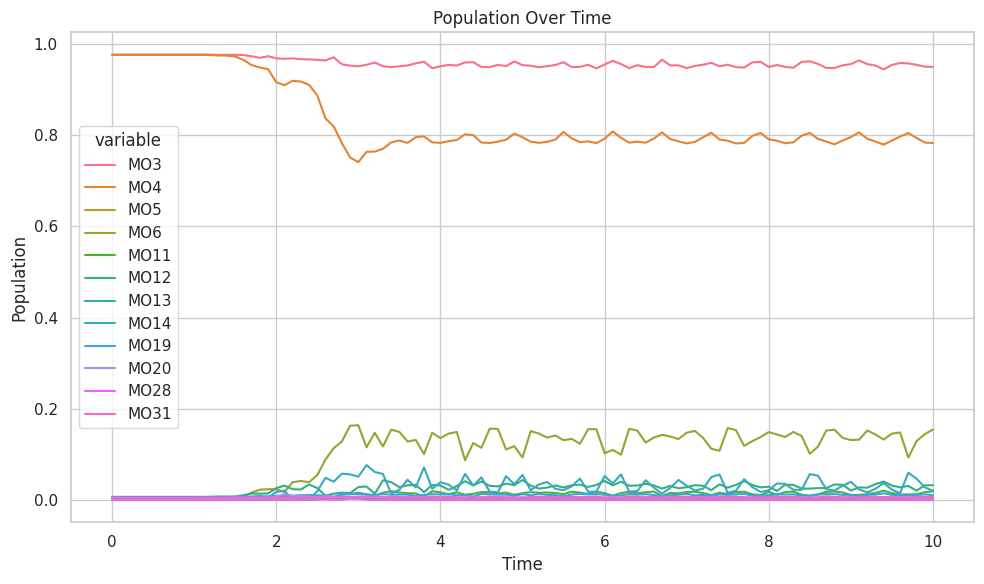

In [30]:
# transform to sparse long matrix, include time index

import seaborn as sns
npop_long = npop_high_var.melt(ignore_index=False)
npop_long

# plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=npop_long, x='time', y='value', hue='variable')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Over Time')
plt.grid(True)
plt.tight_layout()

## Quantify the pairwise correlation in the data

- negative correlation: y values decrease for increasing x - large values of one feature correspond to small values of the other feature
- weak or no correlation: no trend observable, association between two features is hardly observable
- positive correlation: y values increase for decreasing x - small values of one feature correspond to small values of the other feature

Remember that correlation does not indicate causation - the reason that two features are associated can lie in their dependence on same factors.

Correlate the value pairs using Pearson's $r$. Pearson's $r$ is a measure of the linear relationship between features:

$r = \frac{\sum_i(x_i − \bar{x})(y_i − \bar{y})}{\sqrt{\sum_i(x_i − \bar{x})^2 \sum_i(y_i − \bar{y})^2}}$

Here, $\bar{x}$ and $\bar{y}$ indicate mean values. $i$ runs over the whole data set. For a positive correlation, $r$ is positive, and negative for a negative correlation, with minimum and maximum values of -1 and 1, indicating a perfectly linear relationship. Weakly or not correlated features are characterized by $r$-values close to 0.

Other measures of correlation that can be used are Spearman's rank (value pairs follow monotonic function) or Kendall's $\tau$ (measures ordinal association), but they do not apply here. You can also define measures yourself.

In [31]:
# print the correlation matrix

corr_matrix = npop_high_var.corr()
corr_matrix

,MO3,MO4,MO5,MO6,MO11,MO12,MO13,MO14,MO19,MO20,MO28,MO31
MO3,1.000000,0.926317,-0.939877,-0.907659,-0.966070,-0.818545,-0.693899,-0.590497,-0.922622,0.072169,0.028125,-0.954677
MO4,0.926317,1.000000,-0.902028,-0.964051,-0.844402,-0.782851,-0.827863,-0.726726,-0.822057,-0.033661,-0.013774,-0.917615
MO5,-0.939877,-0.902028,1.000000,0.948240,0.880870,0.661812,0.626793,0.474882,0.821516,-0.146431,-0.109305,0.960655
MO6,-0.907659,-0.964051,0.948240,1.000000,0.841446,0.699677,0.688966,0.538846,0.776518,-0.057147,-0.034388,0.924548
MO11,-0.966070,-0.844402,0.880870,0.841446,1.000000,0.855583,0.561679,0.447701,0.846299,-0.160839,-0.060132,0.893978
MO12,-0.818545,-0.782851,0.661812,0.699677,0.855583,1.000000,0.576447,0.514489,0.721802,0.025860,-0.031353,0.701058
MO13,-0.693899,-0.827863,0.626793,0.688966,0.561679,0.576447,1.000000,0.941180,0.615849,0.128776,0.093789,0.699397
MO14,-0.590497,-0.726726,0.474882,0.538846,0.447701,0.514489,0.941180,1.000000,0.592609,0.193889,0.114510,0.581761
MO19,-0.922622,-0.822057,0.821516,0.776518,0.846299,0.721802,0.615849,0.592609,1.000000,0.100944,0.093893,0.860423
MO20,0.072169,-0.033661,-0.146431,-0.057147,-0.160839,0.025860,0.128776,0.193889,0.100944,1.000000,0.449512,-0.151806


The diagonal values tell us that each value is perfectly correlated with itself. We are not interested in the diagonal values and also not in the correlation with time. We also need to get rid of redundant entries. Finally, we need to find the value pairs that exhibit the highest linear correlation. We still want to know if it is positive or negative correlation, so we cannot get rid of the sign.

In [ ]:
# get rid of time column, lower triangular and diagonal entries of the correlation matrix
# sort the remaing values according to their absolute value, but keep the sign

def get_sorted_correlations(correlation_matrix):
    """
    Get sorted correlations from the correlation matrix.
    
    Parameters:
    correlation_matrix (DataFrame): The correlation matrix.
    
    Returns:
    Series: Sorted correlations with absolute values.
    """
    # # Drop the 'time' column
    # correlation_matrix = correlation_matrix.drop(columns=['time'])
    
    # # Get lower triangular part and diagonal entries
    # lower_triangular = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
    # Get upper triangular part excluding the diagonal
    upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Flatten and sort by absolute values
    sorted_correlations = upper_triangular.stack().abs().sort_values(ascending=False)
    
    return sorted_correlations

sorted_correlations = get_sorted_correlations(corr_matrix)
sorted_correlations



MO3   MO11    0.966070
MO4   MO6     0.964051
MO5   MO31    0.960655
MO3   MO31    0.954677
MO5   MO6     0.948240
                ...   
MO4   MO20    0.033661
MO12  MO28    0.031353
MO3   MO28    0.028125
MO12  MO20    0.025860
MO4   MO28    0.013774
Length: 66, dtype: float64

Note that the entries in the left column are not repeated if they do not change from the row above (so the fourth feature pair is MO3 and MO6).

### Task 4: Print the resulting data to a file

In [33]:
# write to file

def write_sorted_correlations_to_file(sorted_correlations, filename):
    """
    Write sorted correlations to a file.
    
    Parameters:
    sorted_correlations (Series): The sorted correlations.
    filename (str): The name of the output file.
    """
    with open(filename, 'w') as f:
        for index, value in sorted_correlations.items():
            f.write(f"{index[0]} {index[1]} {value}\n")

In [34]:
write_sorted_correlations_to_file(sorted_correlations, 'sorted_correlations.txt')

### Task 5: Calculate the Euclidean distance (L2 norm) for the vectors in `table.dat`


The Euclidean distance measures the distance between to objects that are not points:

$d(p,q) = \sqrt{\left(p-q\right)^2}$

In this case, consider each of the columns in table.dat as a vector in Euclidean space, where column $r(x)$ and column $v(x)$ denote a pair of vectors that should be compared, as well as $r(y)$ and $v(y)$, and r(z) and v(z).

(Background: These are dipole moment components in different gauges, the length and velocity gauge.)

In [56]:
# read in table.dat - I suggest reading it as a numpy array
# replace the NaNs by zero

table_df = pd.read_csv('../data/table.dat', sep='\\s+', header=0)
table_df = table_df.fillna(0)  # Replace NaNs with zeros
table_df

,i,j,r(x),v(x),r(y),v(y),r(z),v(z)
0,1,2,0.000000,0.000000,0.000000,0.000000,0.997737,1.210318
1,1,3,-1.171532,-1.106132,0.940962,0.888433,0.000000,0.000000
2,1,4,-0.940962,-0.888433,-1.171532,-1.106132,0.000000,0.000000
3,1,5,0.000000,-0.000000,0.000000,0.000000,-0.322745,-0.534832
4,1,6,0.051684,0.000184,-0.040177,-0.000141,0.000000,0.000000
...,...,...,...,...,...,...,...,...
4945,97,99,-0.157828,1.919270,-0.244202,2.969592,0.000000,-0.000000
4946,97,100,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
4947,98,99,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
4948,98,100,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000


Now calculate how different the vectors in column 2 are from column 3, column 4 from column 5, and column 6 from column 7.

In [46]:
# calculate the Euclidean distance

def calculate_euclidean_distance(df,cols=[2,3]):
    """
    Calculate the Euclidean distance for each row in the DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    
    Returns:
    Series: A Series containing the Euclidean distances.
    """

    return np.sqrt((np.square(df.iloc[:,cols[0]] - df.iloc[:,cols[1]])))

euclid_dist_23 = calculate_euclidean_distance(table_df, cols=[2, 3])
euclid_dist_45 = calculate_euclidean_distance(table_df, cols=[4, 5])
euclid_dist_67 = calculate_euclidean_distance(table_df, cols=[6, 7])


0       0.000000
1       0.065400
2       0.052529
3       0.000000
4       0.051500
          ...   
4945    2.077098
4946    0.000000
4947    0.000000
4948    0.000000
4949    0.000000
Length: 4950, dtype: float64

Text(0, 0.5, 'Euclidean Distance')

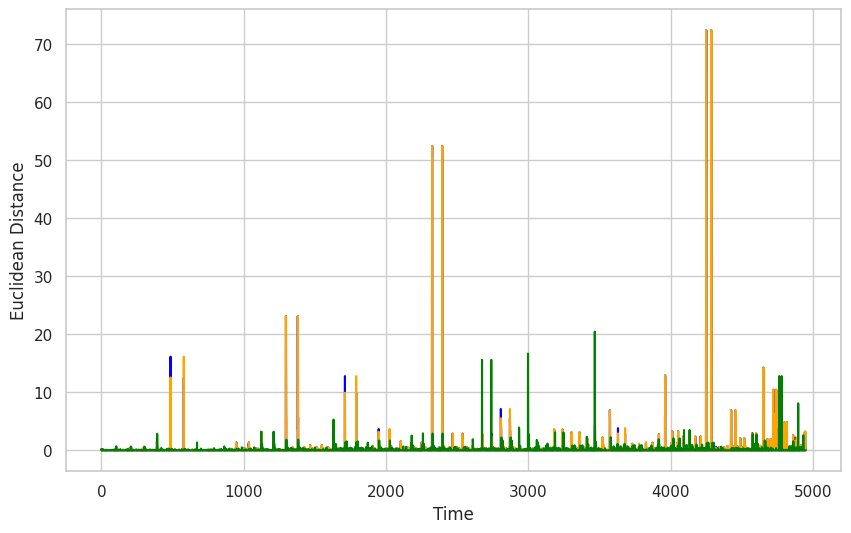

In [66]:
# plot the result and save to a .pdf

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.plot(euclid_dist_23, label='Euclidean Distance 2-3', color='blue')
ax.plot(euclid_dist_45, label='Euclidean Distance 4-5', color='orange')
ax.plot(euclid_dist_67, label='Euclidean Distance 6-7', color='green')
ax.set_xlabel('Time')
ax.set_ylabel('Euclidean Distance')

In [52]:
# print the result to a file

pd.DataFrame(list(zip(euclid_dist_23, euclid_dist_45, euclid_dist_67))).to_csv('euclidean_distances.txt', sep=' ', header=["2-3","4-5","6-7"], index=False, float_format='%.6e')

# Numerical analysis

Analyze the data using autocorrelation functions and discrete Fourier transforms. Plot your results.

In [7]:
# define some global functions
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Read in `efield.t` and Fourier-transform relevant columns

In [12]:
# read and plot efield.t
data_efield= np.loadtxt('C:\\Users\\carol\\development-repo-individual-work-CaroLin218\\data\\efield.t', skiprows=1)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 2.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 3.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 4.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 6.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 7.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 8.0000000e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 9.0000000e-01  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  0.0000000e+00 -3.4723600e-04  0.0000000e+00]
 [ 1.1000000e+00  0.0000000e+00 -2.0957940e-03  0.0000000e+00]
 [ 1.2000000e+00  0.0000000e+00 -4.1337070e-03  0.0000000e+00]
 [ 1.3000000e+00  0.0000000e+00 -3.0513230e-03  0.0000000e+00]
 [ 1.4000000e+00  0.0000000e+00  3.7372540e-03  0.0000000e+00]
 [ 1.5000000e+00  0.0000000e+00  1.4462925e-02  0.00000

Here we are interested in column 2 since the others are constant.

In [14]:
# discard the columns with variance below threshold - these are considered constant
ind=[0]
time= data_efield[:,0]
print(time)
for i in range(1, 4):
    if np.var(data_efield[ :,i]) <1e-4:
        ind.append(i)
data_efield = np.delete(data_efield, ind, axis=1)
#data_efield = np.concatenate(data_efield)
print(data_efield)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.00034724]
 [-0.00209579]
 [-0.00413371]
 [-0.00305132]
 [ 0.00373725]
 [ 0.01446292]
 [ 0.02240912]
 [ 0.01964709]
 [ 0.00305712]
 [-0.02169315]
 [-0.04174038]
 [-0.04409028]
 [-0.02404405]
 [ 0.01061018]
 [ 0.04290629]
 [ 0.056     ]
 [ 0.04290629]
 [ 0.01061018]
 [-0.02404405]
 [-0.04409028]
 [-0.04174038]
 [-0.02169315]
 [ 0.0

In [15]:
# discrete Fourier transform of the remaining column: You only need the real frequencies
data_efield_four= np.fft.rfft(data_efield[:,0])#.real
freq = np.fft.rfftfreq(len(data_efield[:,0]))
print(data_efield_four)
print(freq)

[ 7.26814400e-03+0.00000000e+00j  6.46259906e-05-4.15502549e-03j
  3.76586260e-03+1.17174487e-04j  5.50969094e-04-1.18002764e-02j
 -1.15083814e-02-7.16858592e-04j  6.24998929e-04-8.02110389e-03j
 -5.61568135e-02-5.25551567e-03j -1.47626228e-02+1.35066131e-01j
  2.35411148e-01+2.94418189e-02j  4.74200878e-02-3.36567401e-01j
 -4.12515967e-01-6.46786150e-02j -7.62597723e-02+4.41406037e-01j
  4.14420738e-01+7.82536930e-02j  6.96021358e-02-3.39551767e-01j
 -2.38341438e-01-5.27310080e-02j -3.26021035e-02+1.37206844e-01j
  5.75868428e-02+1.46331401e-02j  2.54993131e-03-9.41874876e-03j
  9.63417709e-03+2.76976414e-03j  3.00559657e-03-9.87356422e-03j
 -3.15752294e-03-1.01509401e-03j  7.51596262e-04-2.21885403e-03j
 -3.37102284e-03-1.20062980e-03j -5.75245238e-04+1.53896863e-03j
 -6.55180982e-04-2.56579787e-04j -6.08138560e-04+1.48447532e-03j
  8.78082747e-04+3.75772128e-04j -8.20923275e-05+1.83869084e-04j
  7.45320614e-04+3.46765023e-04j  2.64961919e-04-5.47086382e-04j
  1.84330990e-05+9.284057

### Task 2: Generate a plot of your results to be saved as pdf.

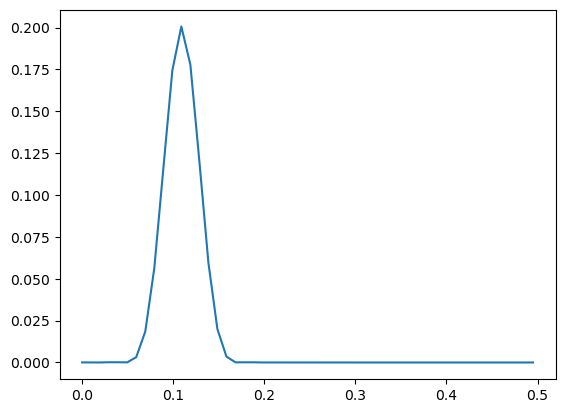

In [198]:
# plot your results
plt.plot(freq, abs(data_efield_four)**2)
#plt.plot(data_efield)
plt.savefig("DataEFieldFourreirTransformed.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Task 3: Calculate the autocorrelation function from nstate_i.t
The autocorrelation function measures how correlated subsequent vectors are with an initial vector; ie. 

$\Psi_{corr} = \langle \Psi(t=0) | \Psi(t) \rangle = \int_0^{tfin} \Psi(0)^* \Psi(t) dt$

Since we are in a numerical representation, the integral can be replaced with a sum; and the given vectors are already normalized.

In [31]:
# read in as numpy array
data_nstate= np.loadtxt('C:\\Users\\carol\\development-repo-individual-work-CaroLin218\\data\\nstate_i.t', skiprows=1)
print(data_nstate)

[[ 0.          1.          0.         ...  0.          0.
   0.        ]
 [ 0.1         1.         -0.         ...  0.          0.
   0.        ]
 [ 0.2         1.         -0.         ...  0.          0.
   0.        ]
 ...
 [ 9.8         0.88892986  0.19466015 ...  0.          0.
   0.        ]
 [ 9.9         0.88892986  0.19466015 ...  0.          0.
   0.        ]
 [10.          0.88892986  0.19466015 ...  0.          0.
   0.        ]]


In [32]:
# store the time column (column 0) in a vector and drop from array
time = data_nstate[:, 0]
print(len(time))
data_nstate = np.delete(data_nstate, 0, axis=1)
print(data_nstate)

101
[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.         -0.          0.         ...  0.          0.
   0.        ]
 [ 1.         -0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.88892986  0.19466015  0.         ...  0.          0.
   0.        ]
 [ 0.88892986  0.19466015  0.         ...  0.          0.
   0.        ]
 [ 0.88892986  0.19466015  0.         ...  0.          0.
   0.        ]]


In [37]:
# correct the data representation: this is in fact a complex matrix
# the real part of each matrix column is contained in numpy array column 0, 2, 4, 6, ...
# the imaginary part of each matrix column is contained in numpy array column 1, 3, 5, 7, ...
# convert the array that was read as dtype=float into a dtype=complex array
data_complex= data_nstate[:, ::2] +1j*data_nstate[:, 1::2]
print(data_complex)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.19466015 0.         0.         ... 0.         0.         0.        ]
 [0.19466015 0.         0.         ... 0.         0.         0.        ]
 [0.19466015 0.         0.         ... 0.         0.         0.        ]]


In [41]:
# for the autocorrelation function, we want the overlap between the first vector at time 0 and all
# subsequent vectors at later times - the sum of the product of initial and subsequent vectors for each time step
autocorrelation=np.zeros(len(time), dtype=complex)
for j in range(0, len(time)):
    autocorrelation[j]=np.sum(data_complex[:, 0] * np.conjugate(data_complex[:, j]))
#print(temp)  
print((autocorrelation))


[ 8.75199918e+01-1.75469067e-16j  0.00000000e+00+0.00000000e+00j
  1.16796092e-13-5.33357914e-13j -9.23768356e-07-2.89428594e-06j
 -4.09049885e-01+7.22147968e-01j  5.26011919e-06+1.38401405e-05j
 -7.44018133e-06+7.97266634e-06j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  5.24131179e-07+1.45627769e-06j
  2.12246444e-05-1.75153569e-06j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  6.78270198e-07+1.00368081e-06j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -1.12315850e-01-3.13280432e-02j -1.49884878e-06-5.21297890e-08j
  8.49168114e-06-3.78985660e-07j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -3.77821491e-06-1.24640471e-06j
 -3.11044574e-06+7.95560254e-07j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -1.24828100e-06-2.05674667e-06j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -2.43391713e-01+2.37002349e-01j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

### Task 4: Generate a plot of your results to be saved as pdf.

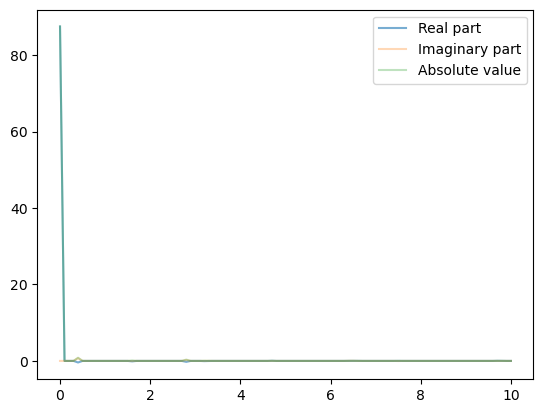

In [260]:
# plot the autocorrelation function - real, imaginary and absolute part
#print(autocorrelation)
plt.plot(time, autocorrelation.real, label='Real part', alpha=0.6)
plt.plot(time, autocorrelation.imag, label='Imaginary part', alpha=0.3)
plt.plot(time, np.absolute(autocorrelation), label='Absolute value', alpha=0.3)
plt.legend(loc='best')
plt.savefig("nStatePlots.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Task 5: Discrete Fourier transform of the autocorrelation function

In [261]:
# discrete Fourier-transform the autocorrelation function - now we need all frequency components,
# also the negative ones
autocorr_nState_four= np.fft.fft(autocorrelation)[0:len(time)//2]
print(autocorr_nState_four)

[86.78670752+0.95060698j 87.50448557+1.12670349j 87.8178687 +0.59120384j
 87.410811  +0.79616289j 87.99717067+1.07034852j 88.55219219+0.43806278j
 87.96632913+0.17747476j 87.8459881 +0.4783316j  88.62210773+0.51272976j
 88.6143732 -0.27074109j 88.06827724-0.46100138j 88.12478899-0.29944676j
 88.16745627-0.66355548j 87.80270097-1.03806153j 87.24894244-0.63131903j
 87.50695745-0.48172317j 87.63440828-0.91077552j 87.01331968-1.01270465j
 86.52336786-0.56417946j 86.90677567-0.19649943j 86.81085513-0.44777168j
 86.42447486-0.05823944j 86.71441129+0.55490754j 87.2122649 +0.33933015j
 86.94545784-0.01256527j 86.61116799+0.79798655j 87.33151459+1.1260505j
 87.75519953+0.68081891j 87.53345113+0.65392411j 87.77902644+1.05232541j
 88.46840567+0.68429043j 88.11248543+0.04442985j 87.89394241+0.38004122j
 88.3706653 +0.61986783j 88.69735582-0.06469865j 88.25536471-0.61192151j
 88.04941088-0.25327937j 88.25074987-0.5269712j  87.92263265-0.99129883j
 87.34164157-0.85395366j 87.44853493-0.39313537j 87.

### Task 6: Generate a plot of your results to be saved as pdf.

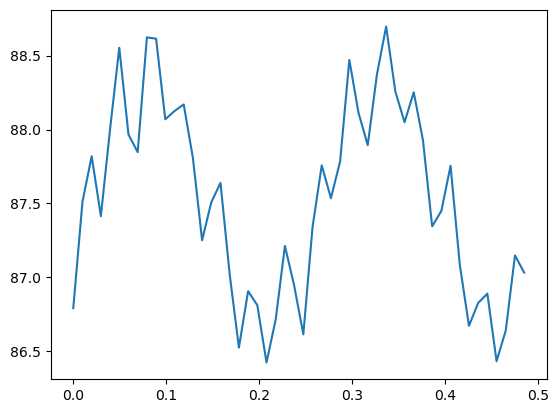

In [262]:
# plot the power spectrum (abs**2)
freq= np.fft.fftfreq(len(time))[0:len(time)//2]
power_spectrum = abs(autocorr_nState_four)**2
plt.plot(freq, abs(autocorr_nState_four))#power_spectrum)
plt.savefig("powerspectrum.pdf", format="pdf", bbox_inches="tight")